In [ ]:
'''
Titanic Survival Prediction
------------------------------------------------
Goal:
  - Predict passenger survival using a simple Logistic Regression model.
  - Demonstrate a standard ML workflow: load → inspect → clean → EDA → encode → split → train → evaluate.

Notes:
  - Keep random_state fixed for reproducibility.
  - Use simple, sensible imputations (median for Age, mode for Embarked).
  - Encode categoricals with one-hot (drop_first=True to avoid dummy trap).
'''

In [12]:
# =============== 1) Imports ===============

import numpy as np               # numerical helpers
import pandas as pd              # data wrangling
import matplotlib.pyplot as plt  # plotting
import seaborn as sns            # better looking plots on top of matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# =============== 2) Load & Inspect ===============
df = pd.read_csv('/users/pranaypakki/Tech/CSVfiles/titanic/train.csv')

# Quick, standard checks to understand the data shape and types
print(df.head())     # a peek at the first 5 rows
print("-" * 50)
print(df.info())     # column types + non-null counts
print(df.describe()) # summary stats for numeric columns

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

In [13]:
# =============== 3) Clean Missing Data ===============
# See where nulls are as this guides the cleaning strategy
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# filling the missing values with corresponding mean values

# Cabin Column removed because too many missing values
df.drop(columns=['Cabin'], errors='ignore', inplace=True)

# Missing age values filled with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Missing embarked values filled with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# check
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


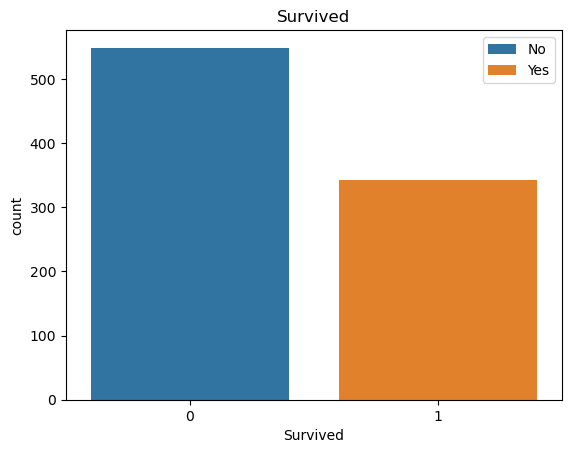

In [15]:
# =============== 4) Exploratory Data Analysis (EDA) ===============
# Class balance, how many survived vs not

sns.countplot(x='Survived', data = df, hue='Survived')
plt.title('Survived')
plt.legend(labels = ['No','Yes'])

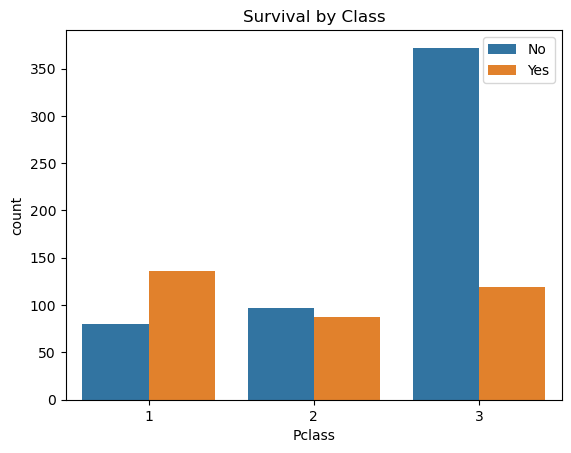

In [16]:
# Survival by passenger class, higher class tends to have higher survival

sns.countplot(x='Pclass', hue='Survived', data = df)
plt.title('Survival by Class')
plt.legend(labels = ['No','Yes'])

Text(0.5, 1.0, 'Survival Rate by Gender')

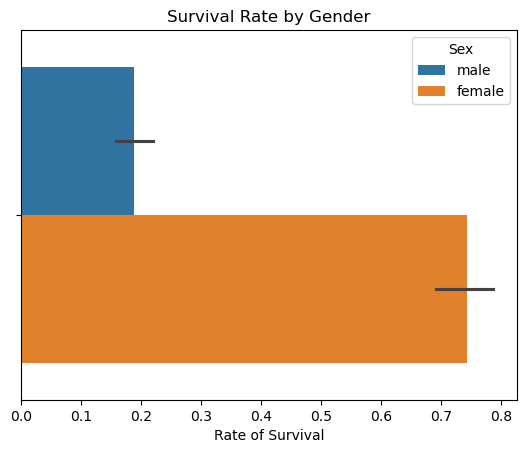

In [17]:
# Survival by Gender
sns.barplot(data = df, x='Survived', hue='Sex')
plt.xlabel('Rate of Survival')
plt.title('Survival Rate by Gender')

Text(0.5, 1.0, 'Age Distribution by Survival')

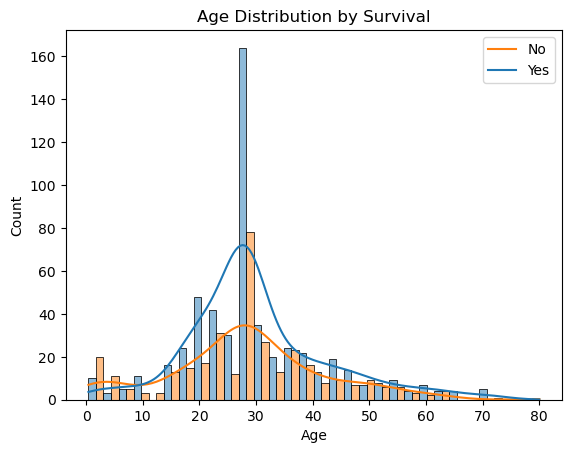

In [18]:
# Age distribution split by survival, younger passengers survived a bit better
sns.histplot(data = df, x = 'Age', hue = 'Survived', kde = True, multiple = 'dodge')
plt.legend(labels = ['No','Yes'])
plt.title('Age Distribution by Survival')

In [19]:
# =============== 5) Feature Engineering ===============
# One-hot encode categoricals. drop_first=True removes one column per category
# Can only be run once, reset kernel to run error free
df = pd.get_dummies(df, columns = ['Sex','Embarked'], drop_first = True)

# Drop columns that are identifiers or not useful for this model
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [20]:
# Splitting features and target
X = df.drop('Survived', axis = 1) # take all columns EXCEPT 'Survived'; all predictors
y = df['Survived']                # target we want to predict

In [21]:
# =============== 6) Train / Test Split ===============
# Hold out 20% for unbiased evaluation; fix random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train:", X_train.shape, "X_test:", X_test.shape) # See the shapes to understand how many rows/columns there are

X_train: (712, 8) X_test: (179, 8)


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



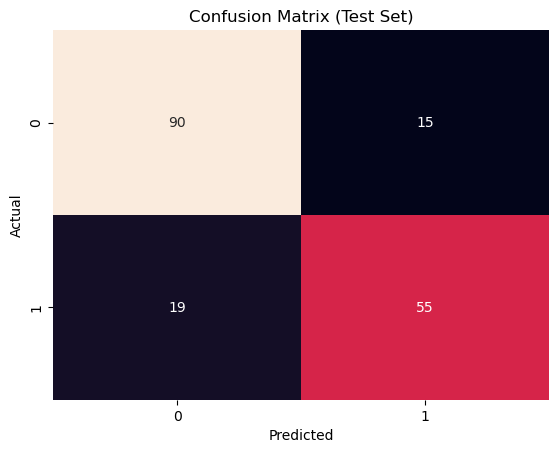

In [22]:
# =============== 7) Model: Logistic Regression ===============
# max_iter set to 1000 ensure convergence on this small dataset
model = LogisticRegression(max_iter = 1000)

model.fit(X_train, y_train)

# Generate predictions for the unseen test set
y_pred = model.predict(X_test)

# =============== 8) Evaluation ===============
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# =============== 9) Conclusion ===============
'''
- Logistic Regression achieved an **accuracy of 81% on the test set.  
- The confusion matrix shows the model balanced both survival and non-survival predictions.  
- Key insights from EDA and model:  
  - Gender: Women had significantly higher survival rates than men.  
  - Class: Passengers in **1st class** had much better survival chances compared to 3rd class.  
  - Age: Younger passengers had slightly better survival odds.
'''